# Sample Notebook for the Data Analytics Hackathon

* The notebook that you submit **must** run (without *any* errors), and create a `submission.csv` file, in the required format.

* This notebook should serve as a template to your final notebook submission.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

`index_col` helps you to retain the index as provided in the dataset.

In [2]:
# train = pd.read_csv("/kaggle/input/ue21cs342aa2/train.csv", index_col = 0)
# test = pd.read_csv("/kaggle/input/ue21cs342aa2/test.csv", index_col = 0)
train = pd.read_csv("train.csv", index_col = 0)
test = pd.read_csv("test.csv", index_col = 0)

In [3]:
train.head()

,Date,Open,Close,Volume,Strategy
id,,,,,
0,2015-06-01,66.208486,75.609978,298506300,Hold
1,2015-06-08,64.116235,74.443331,227974800,Hold
2,2015-06-15,47.701942,71.140831,250670900,Buy
3,2015-06-22,54.754816,72.881344,223614300,Hold
4,2015-06-29,48.031899,66.284718,406814900,Buy


In [4]:
test.head()

,Date,Open,Volume
id,,,
0,2021-03-01,72.708331,205897600
1,2021-03-08,73.310886,214095600
2,2021-03-15,70.610119,151601700
3,2021-03-22,70.256017,193982500
4,2021-03-29,68.258324,220238400


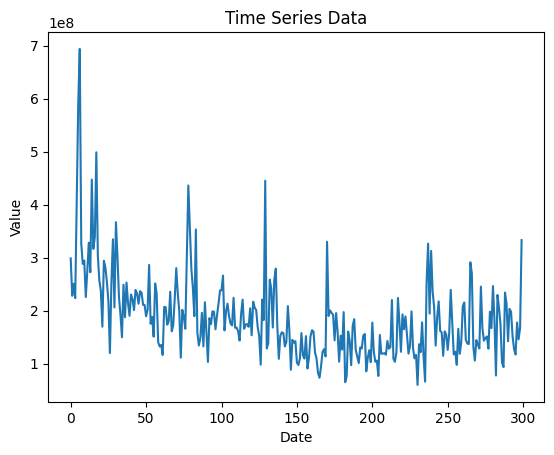

In [5]:

import matplotlib.pyplot as plt

train['Volume'].plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


In [6]:
# pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


From the plot of volume vs date, it is evident that the data contains a decreasing trend and some seasonality. It seems to be following a multiplicative model, we will verify this.

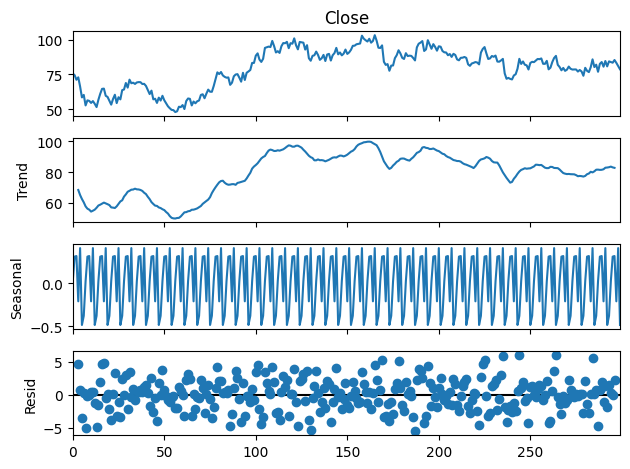

In [20]:

import statsmodels.api as sm

# Decompose the time series into its components
decomposition = sm.tsa.seasonal_decompose(train['Close'], model='additive',period=7)
decomposition.plot()

# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# plt.figure(figsize=(12, 8))
# plt.subplot(411)
# plt.plot(train['value'], label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(seasonal, label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(residual, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()

# # Check if the seasonality component is additive or multiplicative
# # You can use your judgment here based on the seasonal component's behavior.
# # If it appears to be linear, it's likely additive. If it appears exponential, it's likely multiplicative.
# plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

series = train['Close']
adfuller(series)

(-1.8080055426222832,
 0.3764944697922207,
 1,
 298,
 {'1%': -3.4524859843440754,
  '5%': -2.871288184343229,
  '10%': -2.571964047565425},
 1459.2405392582477)

The p-value is 0.37, which is not lesser than 0.05, so we can say that the series is not stationary

<AxesSubplot: xlabel='id'>

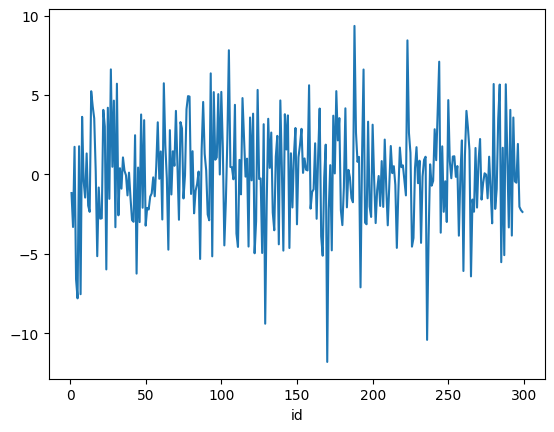

In [32]:
diff = series.diff()
diff.plot()

In [34]:
adfuller(diff.dropna())

(-19.615947588858155,
 0.0,
 0,
 298,
 {'1%': -3.4524859843440754,
  '5%': -2.871288184343229,
  '10%': -2.571964047565425},
 1456.9199224078002)

As the p-value after first order differencing is 0, it can be concluded that the time series is now stationary

In [37]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(diff.dropna(),order=(1s,1,1))
history=model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


# Your model creation, training and inferencing code, along with suitable analysis and reasoning!

In [ ]:
submission = pd.DataFrame()
submission["Date"] = test["Date"]

In [ ]:
sample_submission = pd.read_csv('/kaggle/input/ue21cs342aa2/sample_submission.csv', index_col = 0)

In [ ]:
submission["Close"] = sample_submission["Close"]
submission["Strategy"] = sample_submission["Strategy"]

### In the cell above, we have just provided an example of how to create your submission DataFrame. Please make sure to use **your own forecasts and predictions**, in place of `sample_submission["Close"]` and `sample_submission["Strategy"]`

In [ ]:
submission.head()

,Date,Close,Strategy
id,,,
0,2021-03-01,445.681993,Buy
1,2021-03-08,646.184648,Buy
2,2021-03-15,169.994384,Buy
3,2021-03-22,194.417785,Buy
4,2021-03-29,398.390067,Buy


In [ ]:
submission.to_csv('submission.csv', index=True)